In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LM regressions

## Displacements due to drought

### Regression coefficients

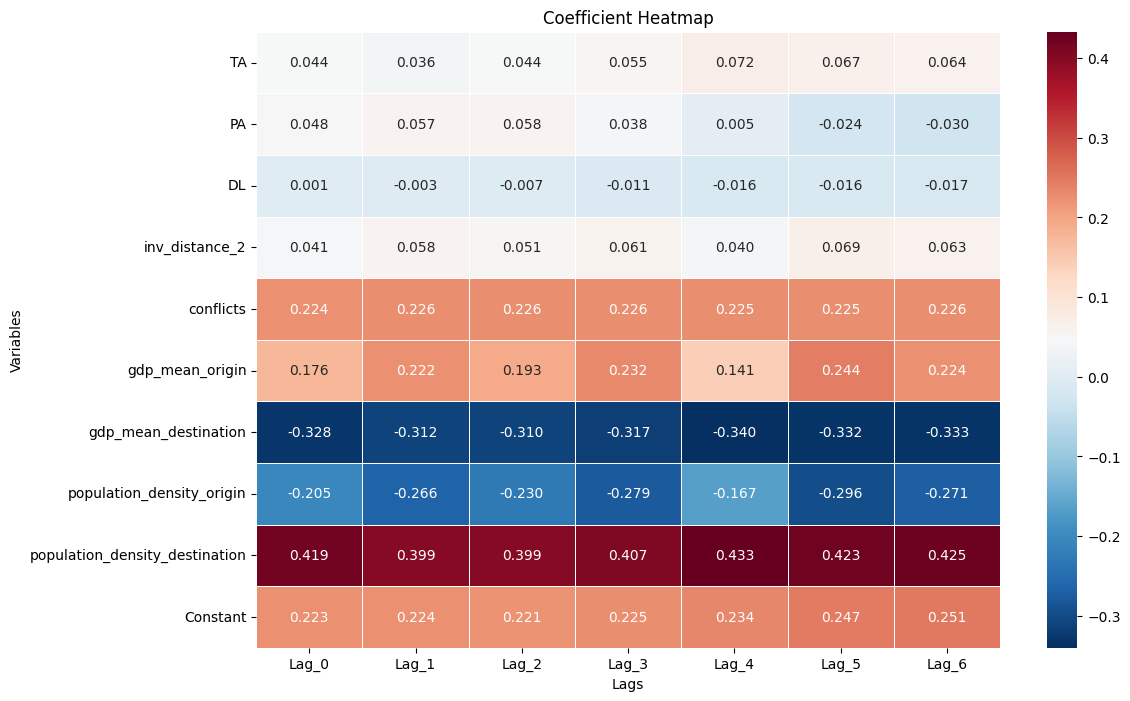

In [2]:
# Creating a dictionary with the coefficients and standard errors
data = {
    'Variable': ['TA', 'PA', 'DL', 'inv_distance_2', 'conflicts', 'gdp_mean_origin', 'gdp_mean_destination',
                 'population_density_origin', 'population_density_destination', 'Constant'],
    'Lag_0': [0.044, 0.048, 0.001, 0.041, 0.224, 0.176, -0.328, -0.205, 0.419, 0.223],
    'Lag_1': [0.036, 0.057, -0.003, 0.058, 0.226, 0.222, -0.312, -0.266, 0.399, 0.224],
    'Lag_2': [0.044, 0.058, -0.007, 0.051, 0.226, 0.193, -0.310, -0.230, 0.399, 0.221],
    'Lag_3': [0.055, 0.038, -0.011, 0.061, 0.226, 0.232, -0.317, -0.279, 0.407, 0.225],
    'Lag_4': [0.072, 0.005, -0.016, 0.040, 0.225, 0.141, -0.340, -0.167, 0.433, 0.234],
    'Lag_5': [0.067, -0.024, -0.016, 0.069, 0.225, 0.244, -0.332, -0.296, 0.423, 0.247],
    'Lag_6': [0.064, -0.030, -0.017, 0.063, 0.226, 0.224, -0.333, -0.271, 0.425, 0.251]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Reshaping the DataFrame for heatmap
heatmap_data = df.set_index('Variable')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap= 'RdBu_r', annot=True, fmt=".3f", linewidths=.5)
plt.title('Coefficient Heatmap')
plt.ylabel('Variables')
plt.xlabel('Lags')
plt.show()


### All years, new

Number of observations: 3630


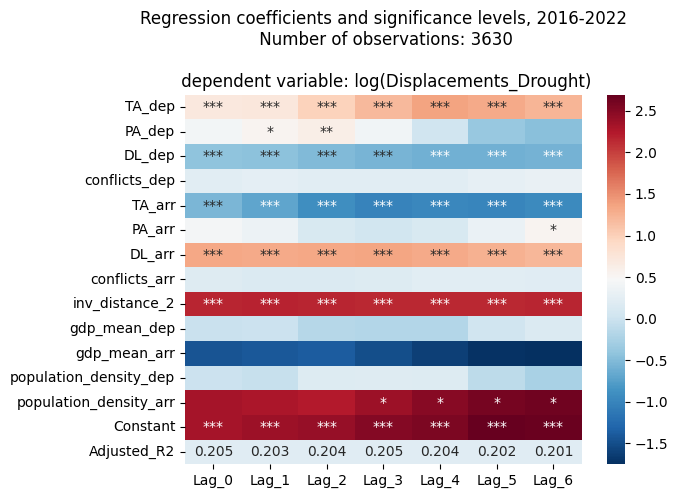

In [3]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all_new.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all_new.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all_new.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-2, vmax=2) 
ax.set_yticklabels(['TA_dep', 'PA_dep', 'DL_dep', 'conflicts_dep', 'TA_arr', 'PA_arr',
       'DL_arr', 'conflicts_arr', 'inv_distance_2', 'gdp_mean_dep',
       'gdp_mean_arr', 'population_density_dep', 'population_density_arr', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Drought)')
plt.savefig("regr_coef_drought_all_new.pdf", bbox_inches='tight')
plt.show()

## Gravity

Number of observations: 1943


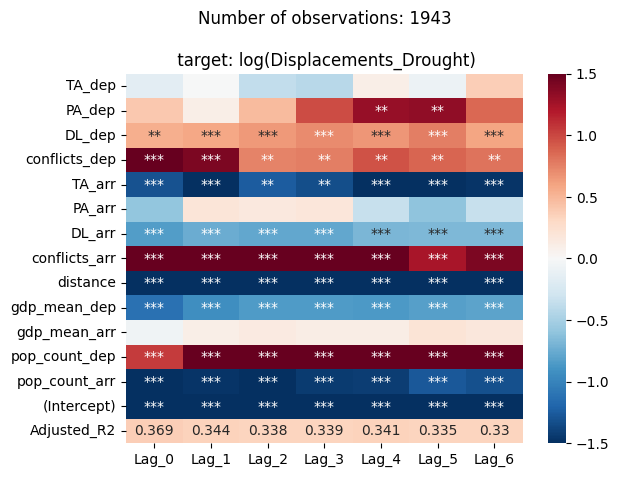

In [4]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_g.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_g.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_g.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs_g.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-1.5, vmax=1.5) 
ax.set_yticklabels(df_t['Variable'].values, rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n target: log(Displacements_Drought)')
plt.savefig("regr_coef_drought_all_new.pdf", bbox_inches='tight')
plt.show()

Number of observations: 1943


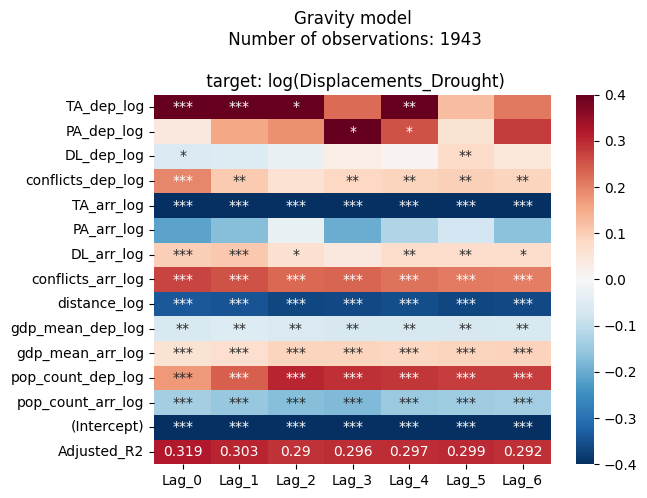

In [5]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_log_g.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_log_g.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_log_g.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs_log_g.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-0.4, vmax=0.4) 
ax.set_yticklabels(df_t['Variable'].values, rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Gravity model\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n target: log(Displacements_Drought)')
plt.savefig("regr_coef_drought_all_new.pdf", bbox_inches='tight')
plt.show()

## conflict

Number of observations: 1943


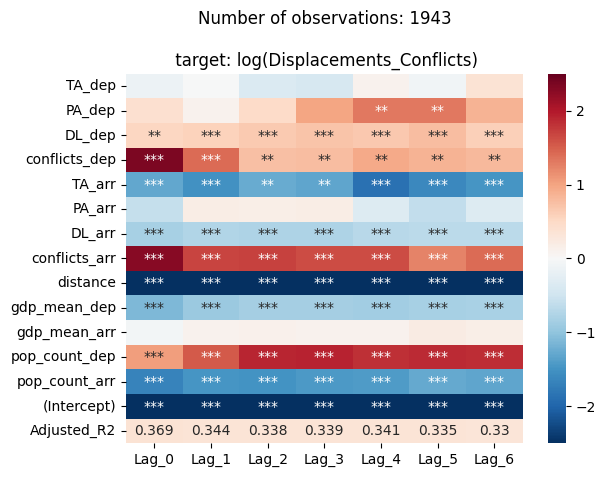

In [6]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_g.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_g.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_g.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs_g.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-2.5, vmax=2.5) 
ax.set_yticklabels(df_t['Variable'].values, rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n target: log(Displacements_Conflicts)')
plt.savefig("regr_coef_drought_all_new.pdf", bbox_inches='tight')
plt.show()

Number of observations: 1943


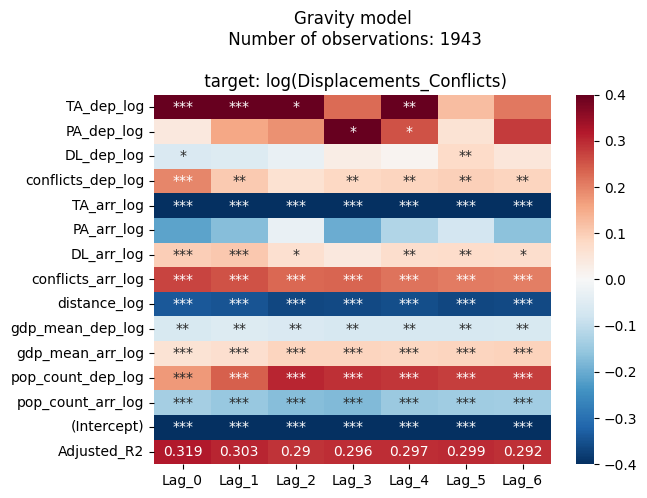

In [7]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_log_g.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_log_g.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_log_g.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs_log_g.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-0.4, vmax=0.4) 
ax.set_yticklabels(df_t['Variable'].values, rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Gravity model\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n target: log(Displacements_Conflicts)')
plt.savefig("regr_coef_drought_all_new.pdf", bbox_inches='tight')
plt.show()

Number of observations: 1199


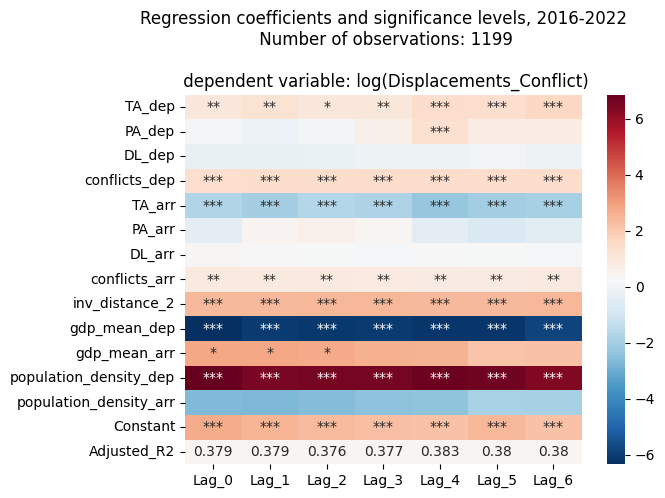

In [8]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all_new_confl.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all_new_confl.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all_new_confl.csv")
nobs = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs_confl.csv")

df = df.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,14):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[14, 1:8] = df_p.iloc[14, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA_dep', 'PA_dep', 'DL_dep', 'conflicts_dep', 'TA_arr', 'PA_arr',
       'DL_arr', 'conflicts_arr', 'inv_distance_2', 'gdp_mean_dep',
       'gdp_mean_arr', 'population_density_dep', 'population_density_arr', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Conflict)')
plt.savefig("regr_coef_confl_all_new.pdf", bbox_inches='tight')
plt.show()

### All years

Number of observations: 1199


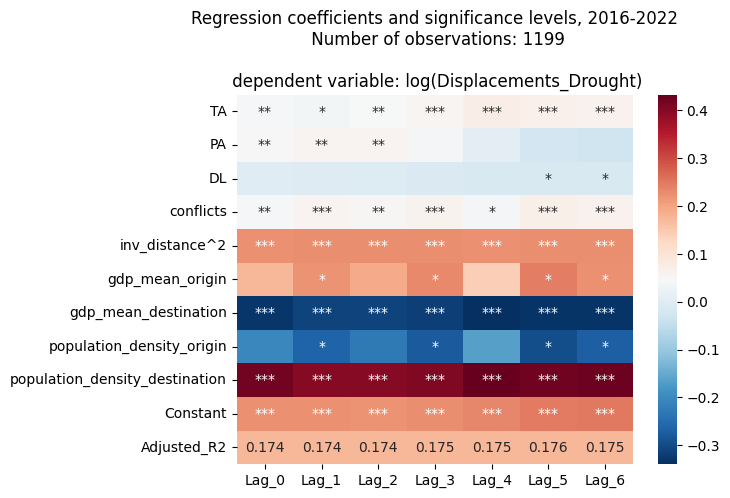

In [9]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all.csv")
df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,10):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
ax.set_ylim(-3, 3)
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r')#, vmin=-3, vmax=3) 
ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                    'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Drought)')
#plt.savefig("regression_coefficients_drought_all.pdf", bbox_inches='tight')
plt.show()

### Individual years, from 2016 to 2022

Number of observations: 130


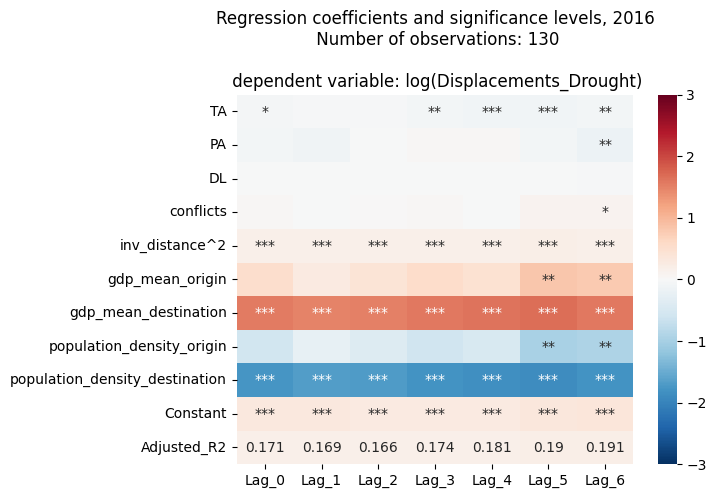

Number of observations: 121


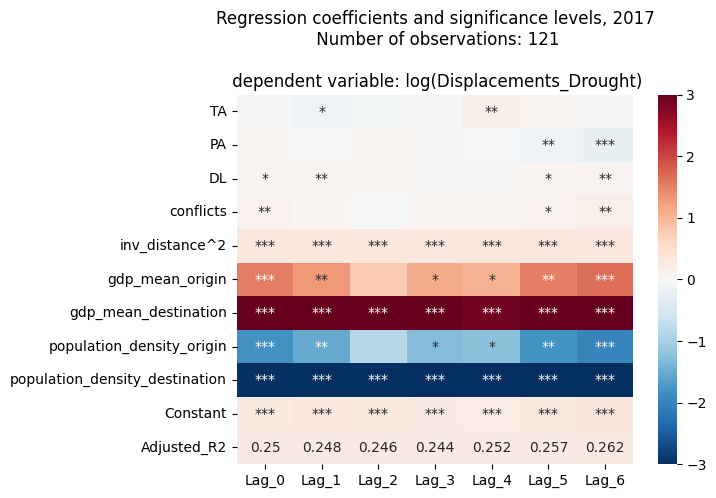

Number of observations: 240


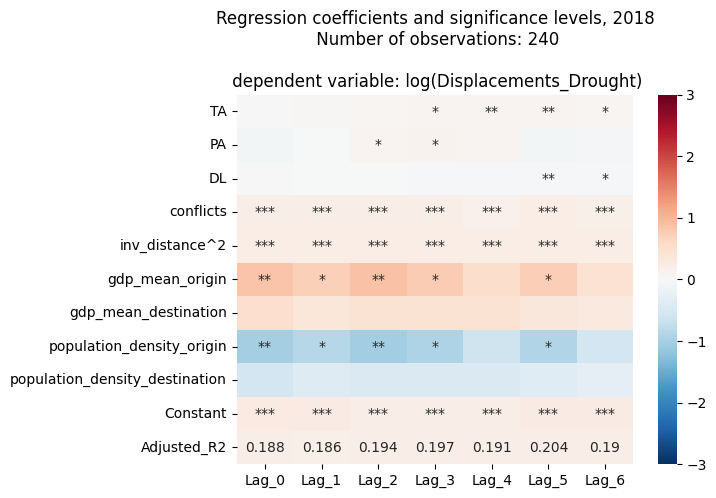

Number of observations: 218


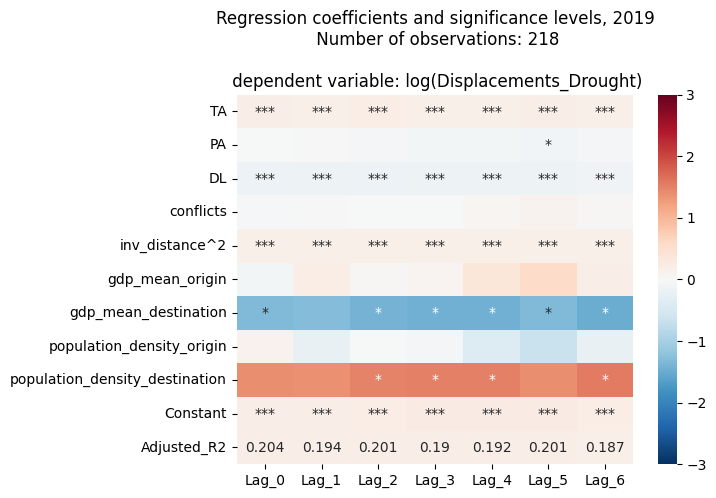

Number of observations: 188


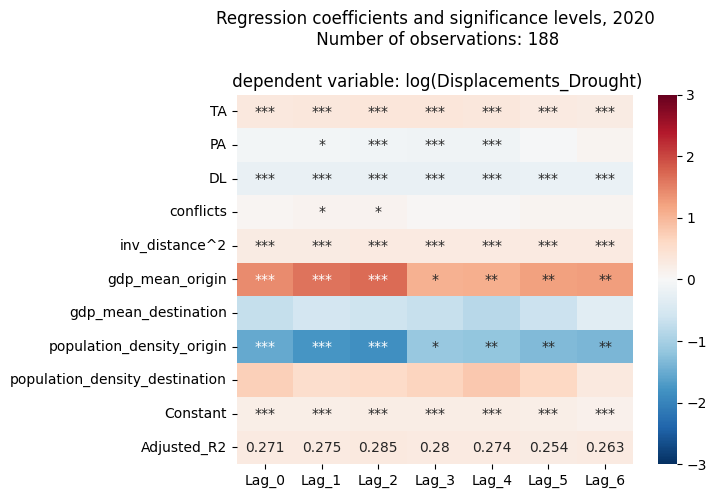

Number of observations: 169


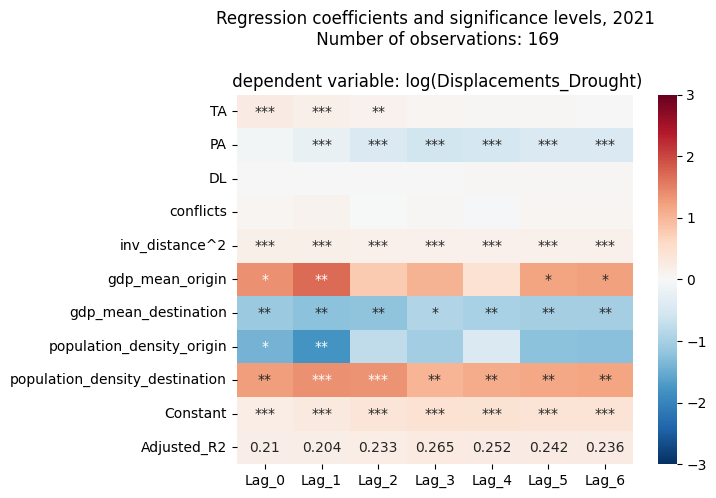

Number of observations: 133


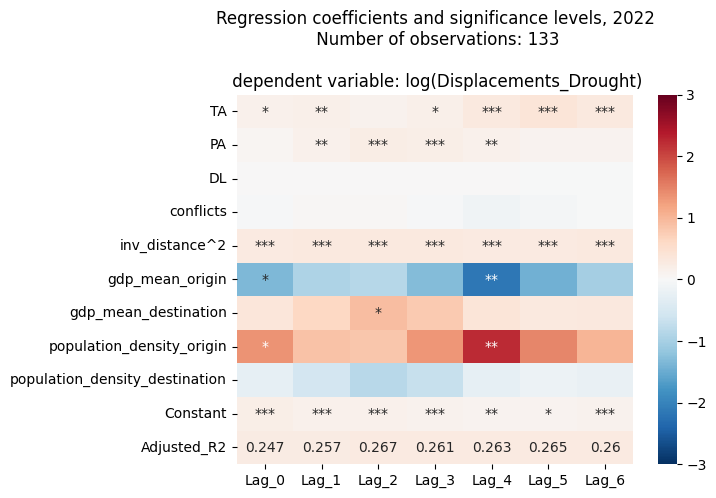

In [10]:
for f in range(16,23):
    #load csv
    df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_"+str(f)+r"_c.csv")
    df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_"+str(f)+r".csv")
    df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_"+str(f)+r".csv")
    df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
    df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

    df1['Unnamed: 0']='Adjusted_R2'
    df1.columns = df.columns
    df_t = pd.concat([df, df1], ignore_index=True)
    df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

    df2.iloc[:,1:].values
    df_p = df_t.copy()

    #substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
    for i in range(0,10):
        for j in range(1,8):
            if df2.iloc[i,j] < 0.01:
                df_p.iloc[i,j] = '***'
            elif df2.iloc[i,j] < 0.05:
                df_p.iloc[i,j] = '**'
            elif df2.iloc[i,j] < 0.1:
                df_p.iloc[i,j] = '*'
            else:
                df_p.iloc[i,j] = ''
    #3 decimal digits in df_p
    df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
    df_p.drop(columns=['Variable'], inplace=True)

    # heatmap of regression coefficients and significance levels
    
    data = df_t.iloc[:,1:].values
    fig, ax = plt.subplots() 
    ax.set_ylim(-3, 3)
    # drawing heatmap on current axes 
    ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-3, vmax=3) 
    ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                        'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
    ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])
 
    print('Number of observations: '+str(nobs.iloc[:,f-14][0]))
    plt.title('Regression coefficients and significance levels, 20'+ str(f)+'\n Number of observations: '+str(nobs.iloc[:,f-14][0]) + '\n\n dependent variable: log(Displacements_Drought)')
    plt.savefig("regression_coefficients_drought_"+ str(f)+".pdf", bbox_inches='tight')
    plt.show()

## Displacements due to conflict

### All years

Number of observations: 1199


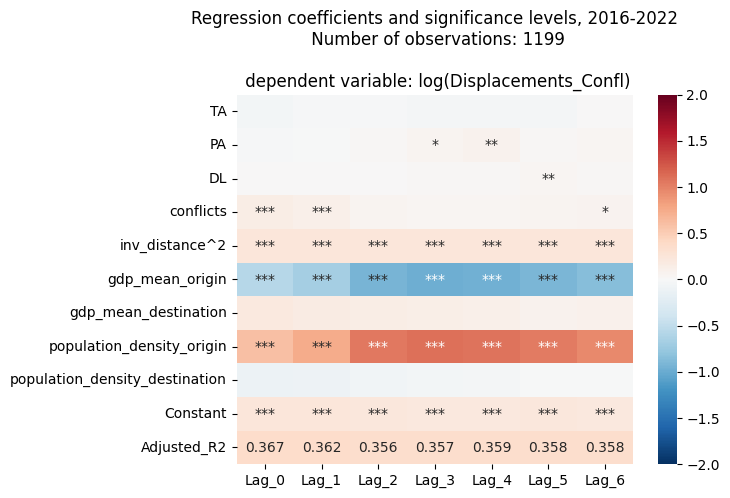

In [11]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_all_confl.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_all_confl.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_all_confl.csv")
nobs_c = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_obs_confl.csv")
df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

df1['Unnamed: 0']='Adjusted_R2'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,10):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:,1:].values
fig, ax = plt.subplots() 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-2, vmax=2) 
ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                    'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])

print('Number of observations: '+str(nobs_c.iloc[:,1][0]))
plt.title('Regression coefficients and significance levels, 2016-2022\n Number of observations: '+str(nobs_c.iloc[:,1][0]) + '\n\n dependent variable: log(Displacements_Confl)')
plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

### Individual years, from 2016 to 2022

Number of observations: 130


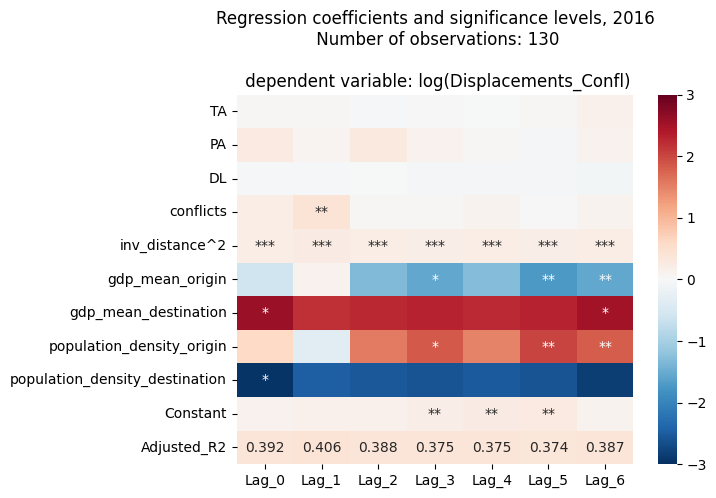

Number of observations: 121


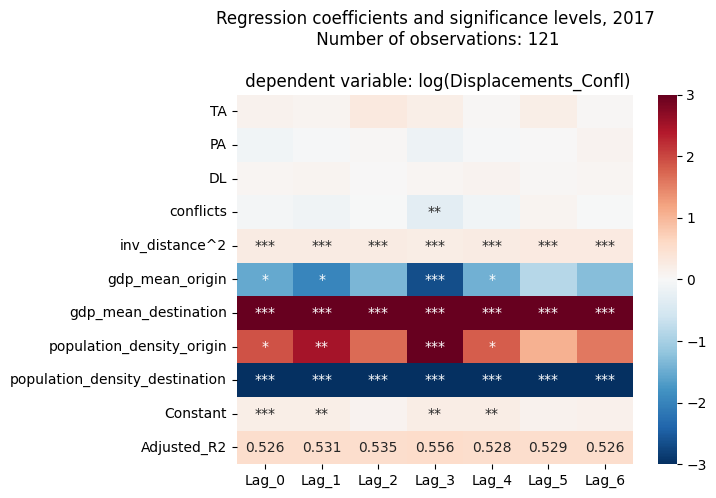

Number of observations: 240


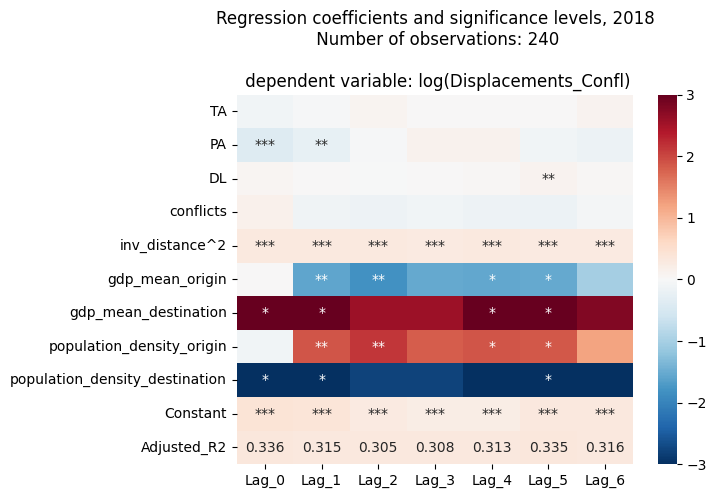

Number of observations: 218


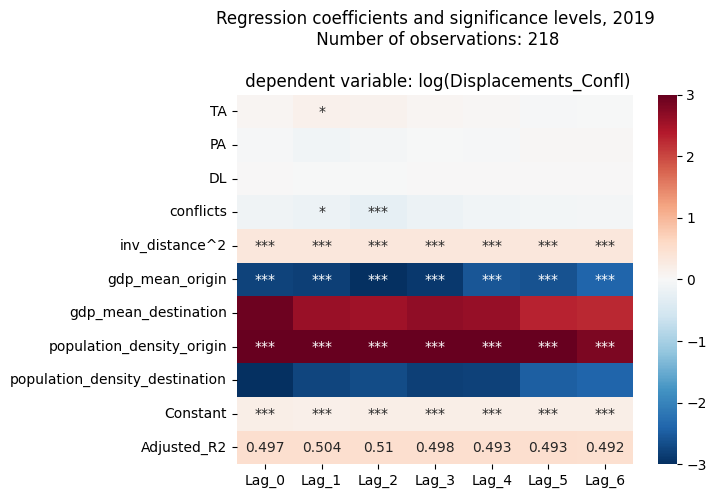

Number of observations: 188


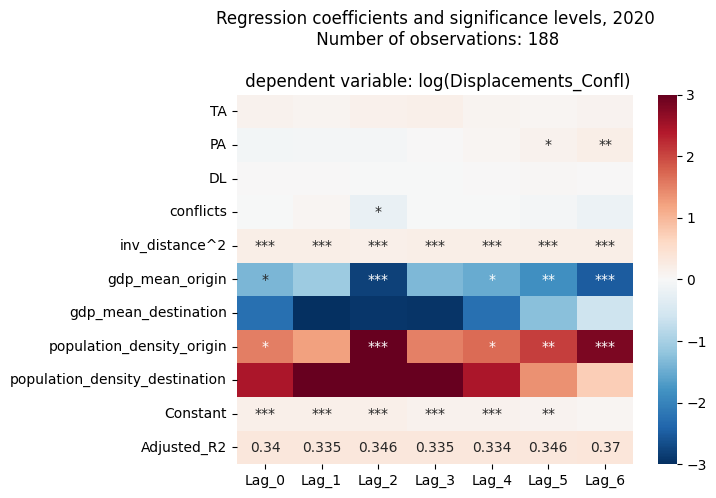

Number of observations: 169


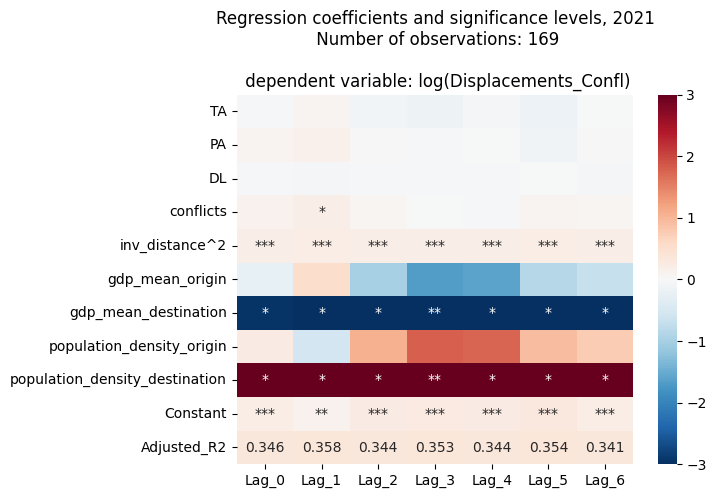

Number of observations: 133


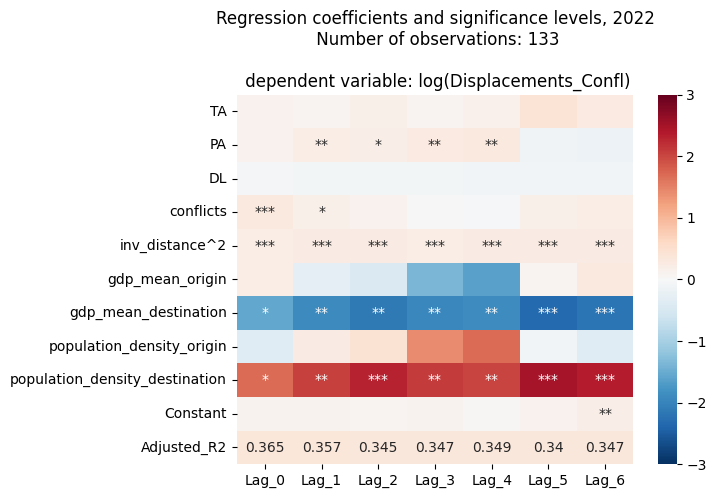

In [12]:
for f in range(16,23):
    #load csv
    df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_"+str(f)+r"_c_confl.csv")
    df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_r_"+str(f)+r"_confl.csv")
    df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/lm_p_"+str(f)+r"_confl.csv")
    df = df.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)
    df2 = df2.reindex([1,2,3,4,5,6,7,8,9,0]).reset_index(drop=True)

    df1['Unnamed: 0']='Adjusted_R2'
    df1.columns = df.columns
    df_t = pd.concat([df, df1], ignore_index=True)
    df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

    df2.iloc[:,1:].values
    df_p = df_t.copy()

    #substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
    for i in range(0,10):
        for j in range(1,8):
            if df2.iloc[i,j] < 0.01:
                df_p.iloc[i,j] = '***'
            elif df2.iloc[i,j] < 0.05:
                df_p.iloc[i,j] = '**'
            elif df2.iloc[i,j] < 0.1:
                df_p.iloc[i,j] = '*'
            else:
                df_p.iloc[i,j] = ''
    #3 decimal digits in df_p
    df_p.iloc[10, 1:8] = df_p.iloc[10, 1:8].astype(float).round(3)
    df_p.drop(columns=['Variable'], inplace=True)

    # heatmap of regression coefficients and significance levels
    
    data = df_t.iloc[:,1:].values
    fig, ax = plt.subplots() 
    ax.set_ylim(-3, 3)
    # drawing heatmap on current axes 
    ax = sns.heatmap(data, annot=df_p, fmt="", cmap= 'RdBu_r', vmin=-3, vmax=3) 
    ax.set_yticklabels(['TA', 'PA', 'DL',  'conflicts', 'inv_distance^2', 'gdp_mean_origin', 'gdp_mean_destination',
                        'population_density_origin', 'population_density_destination', 'Constant','Adjusted_R2'], rotation=0)
    ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])
 
    print('Number of observations: '+str(nobs_c.iloc[:,f-14][0]))
    plt.title('Regression coefficients and significance levels, 20'+ str(f)+'\n Number of observations: '+str(nobs_c.iloc[:,f-14][0]) + '\n\n dependent variable: log(Displacements_Confl)')
    plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
    plt.show()

# Spatial regressions

## SLX - disp

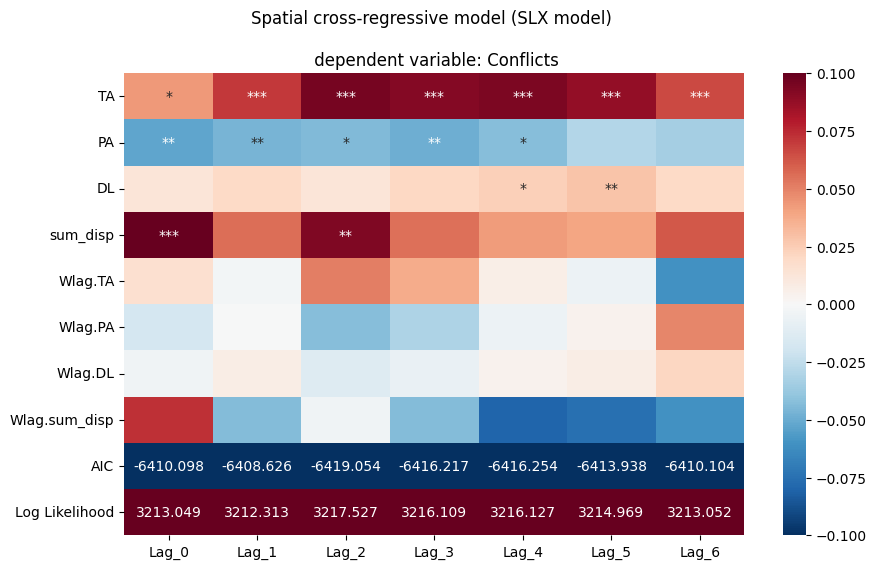

In [13]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_p_all.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_ll_all.csv")

df1['Unnamed: 0']='AIC'
df3['Unnamed: 0']='LogLikelihood'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,8):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[8, 1:8] = df_p.iloc[8, 1:8].astype(float).round(3)
df_p.iloc[9, 1:8] = df_p.iloc[9, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:10,:]

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:10,1:].values
fig, ax = plt.subplots(figsize=(10, 6)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 

#ax.set_ylim(-0.1, 0.1)
ax.set_yticklabels(['TA', 'PA', 'DL', 'sum_disp', 'Wlag.TA', 'Wlag.PA', 'Wlag.DL', 'Wlag.sum_disp', 'AIC', 'Log Likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Spatial cross-regressive model (SLX model) \n\n dependent variable: Conflicts')
#plt.savefig("SLX_disp.pdf", bbox_inches='tight')
plt.show()

## SLX std

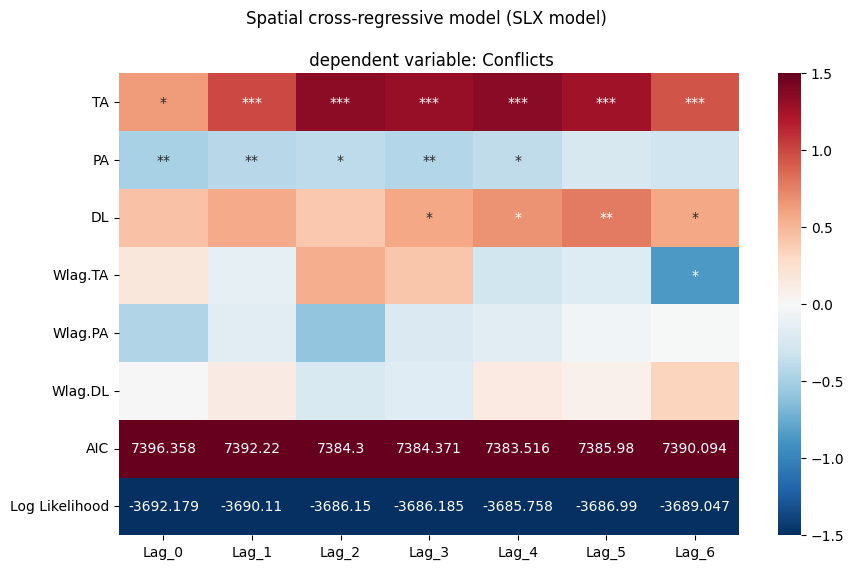

In [14]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_std.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_r_std.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_p_std.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_ll_std.csv")

df1['Unnamed: 0']='AIC'
df3['Unnamed: 0']='LogLikelihood'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,6):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[6, 1:8] = df_p.iloc[6, 1:8].astype(float).round(3)
df_p.iloc[7, 1:8] = df_p.iloc[7, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:8,:]

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:8,1:].values
fig, ax = plt.subplots(figsize=(10, 6)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-1.5, vmax=1.5) 

#ax.set_ylim(-0.1, 0.1)
ax.set_yticklabels(['TA', 'PA', 'DL', 'Wlag.TA', 'Wlag.PA', 'Wlag.DL', 'AIC', 'Log Likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Spatial cross-regressive model (SLX model) \n\n dependent variable: Conflicts')
plt.savefig("SLX_std.pdf", bbox_inches='tight')
plt.show()

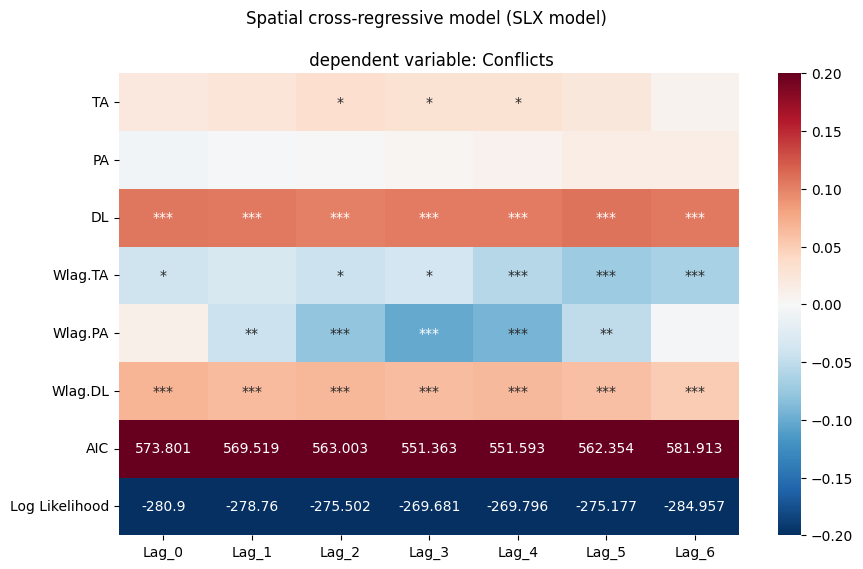

In [15]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_std_1997.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_r_std_1997.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_p_std_1997.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_ll_std_1997.csv")

df1['Unnamed: 0']='AIC'
df3['Unnamed: 0']='LogLikelihood'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,6):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[6, 1:8] = df_p.iloc[6, 1:8].astype(float).round(3)
df_p.iloc[7, 1:8] = df_p.iloc[7, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:8,:]

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:8,1:].values
fig, ax = plt.subplots(figsize=(10, 6)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.2, vmax=0.2) 

#ax.set_ylim(-0.1, 0.1)
ax.set_yticklabels(['TA', 'PA', 'DL', 'Wlag.TA', 'Wlag.PA', 'Wlag.DL', 'AIC', 'Log Likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Spatial cross-regressive model (SLX model) \n\n dependent variable: Conflicts')
#plt.savefig("SLX_std_1997.pdf", bbox_inches='tight')
plt.show()

## SLX (inv_dist)

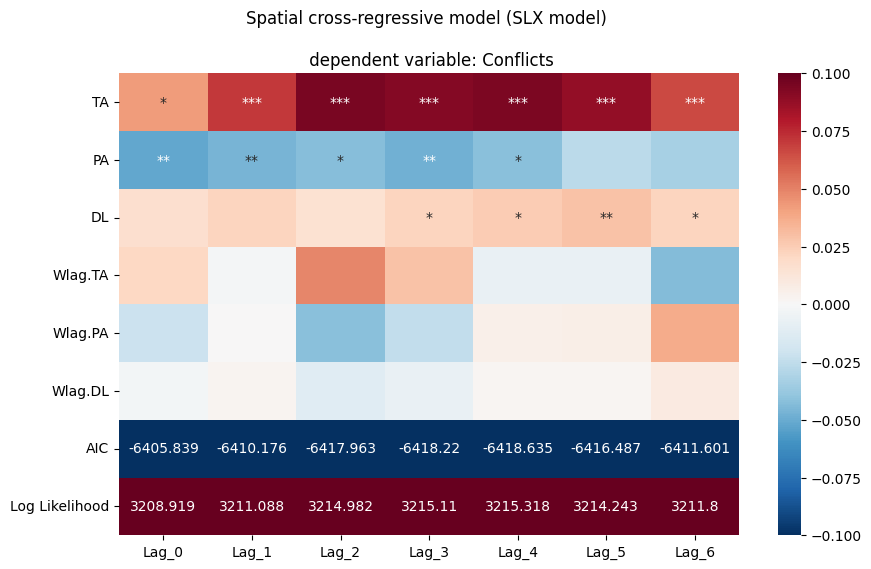

In [16]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_r.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_p.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/slx_ll.csv")

df1['Unnamed: 0']='AIC'
df3['Unnamed: 0']='LogLikelihood'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,6):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[6, 1:8] = df_p.iloc[6, 1:8].astype(float).round(3)
df_p.iloc[7, 1:8] = df_p.iloc[7, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:8,:]

# heatmap of regression coefficients and significance levels

data = df_t.iloc[:8,1:].values
fig, ax = plt.subplots(figsize=(10, 6)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 

#ax.set_ylim(-0.1, 0.1)
ax.set_yticklabels(['TA', 'PA', 'DL', 'Wlag.TA', 'Wlag.PA', 'Wlag.DL', 'AIC', 'Log Likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Spatial cross-regressive model (SLX model) \n\n dependent variable: Conflicts')
#plt.savefig("SLX.pdf", bbox_inches='tight')
plt.show()

## SDM (inv_dist)

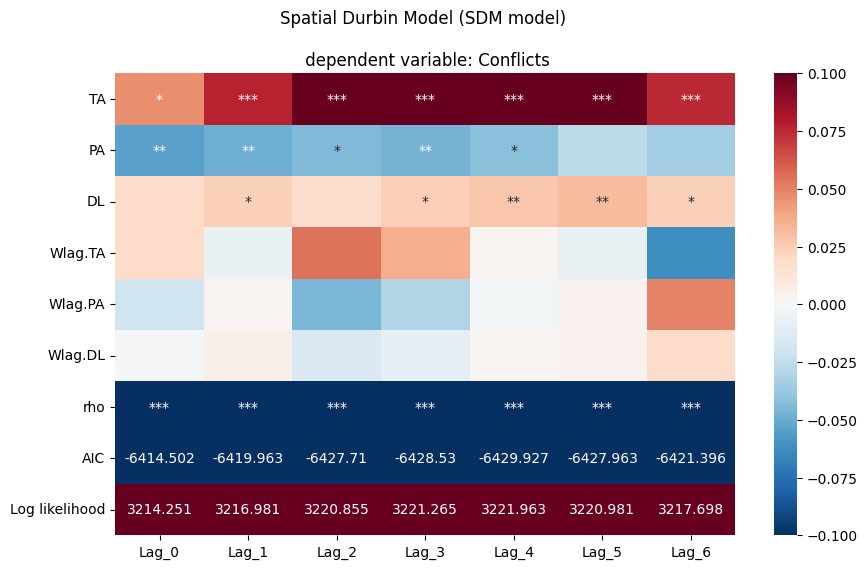

In [17]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_p_all.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_ll_all.csv")


df = df.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df1 = df1.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df2 = df2.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)

df1['Unnamed: 0']='AIC'
df3['Unnamed: 0']='LogLikelihood'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,7):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[7, 1:8] = df_p.iloc[7, 1:8].astype(float).round(3)
df_p.iloc[8, 1:8] = df_p.iloc[8, 1:8].astype(float).round(3)

df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:9,:]
# heatmap of regression coefficients and significance levels
data = df_t.iloc[:9,1:].values
fig, ax = plt.subplots(figsize=(10, 6)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'Wlag.TA', 'Wlag.PA', 'Wlag.DL', 'rho','AIC', 'Log likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Spatial Durbin Model (SDM model) \n\n dependent variable: Conflicts')
plt.savefig("SDM.pdf", bbox_inches='tight')
plt.show()

## SDM

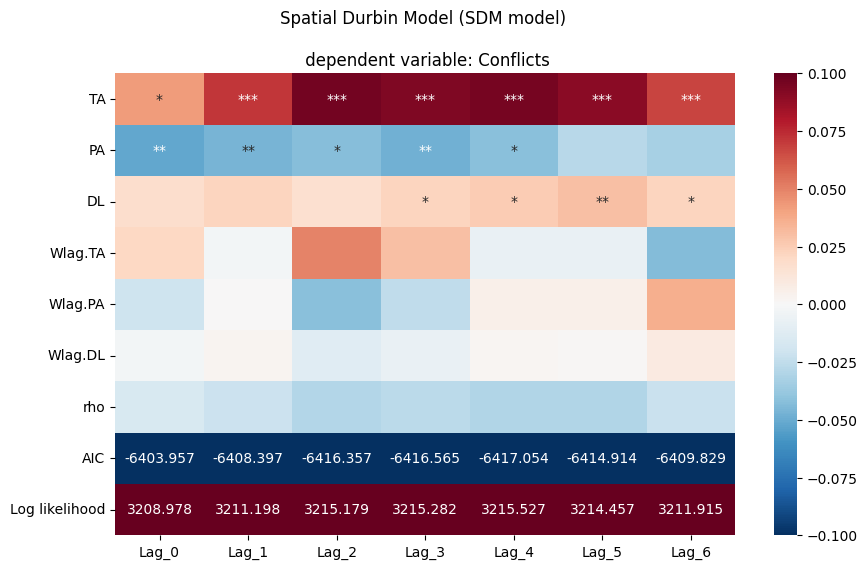

In [18]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_all_2.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_r_all_2.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_p_all_2.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_ll_all_2.csv")


df = df.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df1 = df1.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df2 = df2.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)

df1['Unnamed: 0']='AIC'
df3['Unnamed: 0']='LogLikelihood'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,7):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[7, 1:8] = df_p.iloc[7, 1:8].astype(float).round(3)
df_p.iloc[8, 1:8] = df_p.iloc[8, 1:8].astype(float).round(3)

df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:9,:]
# heatmap of regression coefficients and significance levels
data = df_t.iloc[:9,1:].values
fig, ax = plt.subplots(figsize=(10, 6)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'Wlag.TA', 'Wlag.PA', 'Wlag.DL', 'rho','AIC', 'Log likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Spatial Durbin Model (SDM model) \n\n dependent variable: Conflicts')
#plt.savefig("SDM.pdf", bbox_inches='tight')
plt.show()

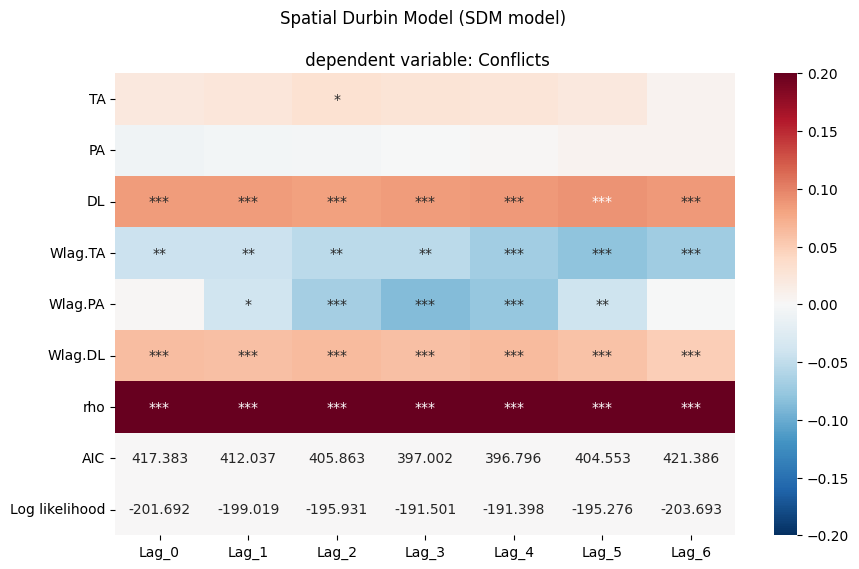

In [19]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_all_1997.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_r_all_1997.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_p_all_1997.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/sdm_ll_all_1997.csv")


df = df.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df1 = df1.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df2 = df2.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)

df1['Unnamed: 0']='AIC'
df3['Unnamed: 0']='LogLikelihood'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,7):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[7, 1:8] = df_p.iloc[7, 1:8].astype(float).round(3)
df_p.iloc[8, 1:8] = df_p.iloc[8, 1:8].astype(float).round(3)

df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:9,:]
# heatmap of regression coefficients and significance levels
data = df_t.iloc[:9,1:].values
data[7:9,:]=np.zeros((2,7))
fig, ax = plt.subplots(figsize=(10, 6)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.2, vmax=0.2) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'Wlag.TA', 'Wlag.PA', 'Wlag.DL', 'rho','AIC', 'Log likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Spatial Durbin Model (SDM model) \n\n dependent variable: Conflicts')
#plt.savefig("SDM.pdf", bbox_inches='tight')
plt.show()

In [20]:
data[7:9,:]=np.zeros((2,7))

## PLM

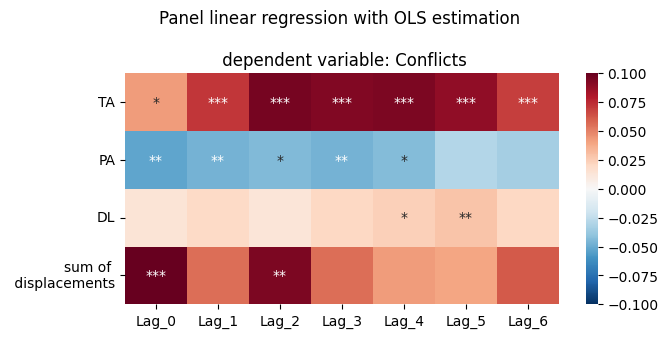

In [29]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_all_d.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_r_all_d.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_p_all_d.csv")

#df = df.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df1 = df1.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df2 = df2.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)

df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,4):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[4, 1:8] = df_p.iloc[4, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:4,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:4,1:].values
#add the log-likelihood to the dataframe
fig, ax = plt.subplots(figsize=(7, 3)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'sum of \n displacements'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression with OLS estimation \n\n dependent variable: Conflicts')
#plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

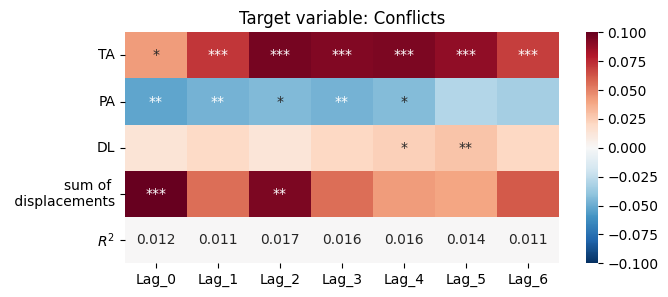

In [40]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_all_d.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_r_all_d.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_p_all_d.csv")

df1['Unnamed: 0']=r'$R^2$'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,4):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[4, 1:8] = df_p.iloc[4, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:5,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:5,1:].values

data[4,:]=np.zeros(7)

fig, ax = plt.subplots(figsize=(7, 3)) 

# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'sum of \n displacements', r'$R^2$'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Target variable: Conflicts')
plt.savefig("regr_c_displ.pdf", bbox_inches='tight')
plt.show()

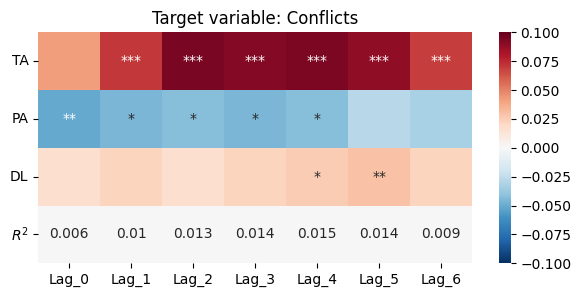

In [41]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_all.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_r_all.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_p_all.csv")

#df1 = df1.iloc[0]
df1['Unnamed: 0']='R squared'
df1.columns = df.columns
df1 = df1.iloc[:1,:]
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,3):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[3, 1:8] = df_p.iloc[3, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:4,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:4,1:].values
data[3,:]=np.zeros(7)
#add the log-likelihood to the dataframe
fig, ax = plt.subplots(figsize=(7, 3)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', r'$R^2$'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Target variable: Conflicts')
plt.savefig("OLS_fe.pdf", bbox_inches='tight')
plt.show()

In [28]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_d.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_aic_d.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_p_d.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_ll_d.csv")

#df1 = df1.iloc[0]
#df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

#df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,4):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.iloc[4, 1:8] = df_p.iloc[4, 1:8].astype(float).round(1)
df_p.iloc[5, 1:8] = df_p.iloc[5, 1:8].astype(float).round(1)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:6,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:6,1:].values
fig, ax = plt.subplots(figsize=(8, 3)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-1.5, vmax=1.5) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'Sum Displacements', 'AIC', 'Log likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression with ML estimation \n\n dependent variable: Conflicts')
#plt.savefig("OLS_fe.jpg", bbox_inches='tight')
plt.show()

IndexError: single positional indexer is out-of-bounds

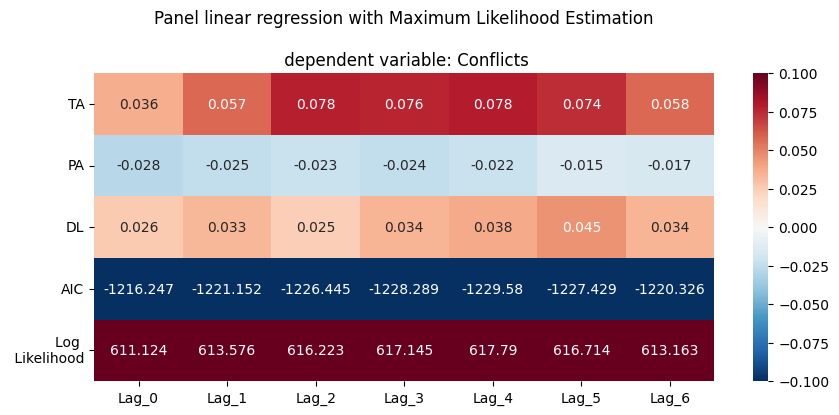

In [24]:
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_aic.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_ll.csv")

df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df2.columns = df.columns
df_t = pd.concat([df, df1, df2], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.iloc[:6, 1:].round(3)

# heatmap of regression coefficients and significance levels
data = df_t.iloc[:6,1:].values

fig, ax = plt.subplots(figsize=(10, 4)) 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1)
ax.set_yticklabels(['TA', 'PA', 'DL', 'AIC', 'Log \n Likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression with Maximum Likelihood Estimation\n\n dependent variable: Conflicts')
plt.savefig("MLE_fe.pdf", bbox_inches='tight')
plt.show()

In [25]:
df_p

,Lag_0,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6
0,0.036,0.057,0.078,0.076,0.078,0.074,0.058
1,-0.028,-0.025,-0.023,-0.024,-0.022,-0.015,-0.017
2,0.026,0.033,0.025,0.034,0.038,0.045,0.034
3,-1216.247,-1221.152,-1226.445,-1228.289,-1229.580,-1227.429,-1220.326
4,611.124,613.576,616.223,617.145,617.790,616.714,613.163


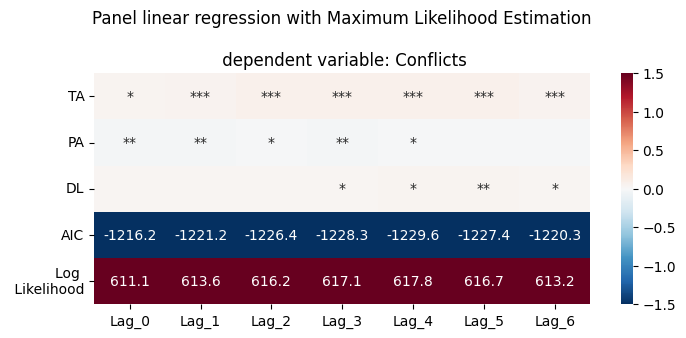

In [26]:
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_aic.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_p.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ml_ll.csv")

df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df3.columns = df.columns
df_t = pd.concat([df, df1, df3], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,3):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''

df_p.iloc[3, 1:8] = df_p.iloc[3, 1:8].astype(float).round(1)
df_p.iloc[4, 1:8] = df_p.iloc[4, 1:8].astype(float).round(1)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:6,:]

# heatmap of regression coefficients and significance levels
data = df_t.iloc[:6,1:].values

fig, ax = plt.subplots(figsize=(8, 3)) 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-1.5, vmax=1.5)
ax.set_yticklabels(['TA', 'PA', 'DL', 'AIC', 'Log \n Likelihood'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression with Maximum Likelihood Estimation\n\n dependent variable: Conflicts')
#plt.savefig("MLE_fe_disp.pdf", bbox_inches='tight')
plt.show()

In [27]:
#load csv
df = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_all_d.csv")
df1 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_r_all_d.csv")
df2 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_p_all_d.csv")
df3 = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/latex/fe_ll_all_d.csv")

#df = df.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df1 = df1.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)
#df2 = df2.reindex([1,2,3,4,5,6,0]).reset_index(drop=True)

df1['Unnamed: 0']='AIC'
df1.columns = df.columns
df_t = pd.concat([df, df1], ignore_index=True)
df_t.columns = ['Variable','Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6']

df2.iloc[:,1:].values
df_p = df_t.copy()

#substitute each value with the significance level: '***' if p-value < 0.01, '**' if p-value < 0.05, '*' if p-value < 0.1, '' if p-value >= 0.1
for i in range(0,4):
    for j in range(1,8):
        if df2.iloc[i,j] < 0.01:
            df_p.iloc[i,j] = '***'
        elif df2.iloc[i,j] < 0.05:
            df_p.iloc[i,j] = '**'
        elif df2.iloc[i,j] < 0.1:
            df_p.iloc[i,j] = '*'
        else:
            df_p.iloc[i,j] = ''
#3 decimal digits in df_p
df_p.loc[len(df_p)] = df3
df_p.iloc[4, 1:8] = df_p.iloc[4, 1:8].astype(float).round(3)
df_p.drop(columns=['Variable'], inplace=True)
df_p = df_p.iloc[:4,:]
# heatmap of regression coefficients and significance levels

data = df_t.iloc[:4,1:].values
#add the log-likelihood to the dataframe
df_p = df_p.append(df3)
data = data.appent(df3)
fig, ax = plt.subplots(figsize=(7, 3)) 
# drawing heatmap on current axes 
ax = sns.heatmap(data, annot= df_p, fmt="", cmap= 'RdBu_r', vmin=-0.1, vmax=0.1) 
ax.set_yticklabels(['TA', 'PA', 'DL', 'sum of \n displacements'], rotation=0)
ax.set_xticklabels(['Lag_0', 'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6'])


plt.title('Panel linear regression \n\n dependent variable: Conflicts')
#plt.savefig("regression_coefficients_confl_"+ str(f)+".pdf", bbox_inches='tight')
plt.show()

ValueError: cannot set a row with mismatched columns